In [148]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.dataset import random_split
from torchvision import datasets
from sklearn.metrics import confusion_matrix
import PIL

In [149]:
##Do Not Touch This Cell

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [150]:
##Do Not Touch This Cell

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
if device =='cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")

Train on CPU...


In [151]:
##Do Not Touch This Cell
max_epochs = 50

random_seed = 671
torch.manual_seed(random_seed)

In [152]:
train_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
##TODO: Split the set into 80% train, 20% validation (there are 50K total images)
train_num = 0.8
val_num = 0.2
train_set, val_set = random_split(dataset, [train_num, val_num])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


**5.1**

In [153]:
loss_list, acc_list = [], []
loss_list_val, acc_list_val = [], []
criterion = nn.CrossEntropyLoss()

for epoch in range(max_epochs):
    #TODO: set the net to train mode:
    net.train()
    epoch_loss = 0.0
    correct = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        ##TODO: pass the data into the network and store the output
        output = net(data)
        ##TODO: Calculate the cross entropy loss between the output and target
        loss = criterion(output, labels)
        ##TODO: Perform backpropagation
        loss.backward()
        optimizer.step()
        ##TODO: Get the prediction from the output
        _, predicted = torch.max(output, 1)
        ##TODO: Calculate the correct number and add the number to correct
        correct += (predicted==labels).sum().item()
        ##TODO: Add the loss to epoch_loss.
        epoch_loss += loss
    ##TODO: calculate the average loss
    avg_loss = epoch_loss / len(train_loader)
    ##TODO: calculate the average accuracy
    avg_acc = correct / len(train_set)
    ##TODO: append average epoch loss to loss list
    loss_list.append(avg_loss.detach().numpy())
    ##TODO: append average accuracy to accuracy list
    acc_list.append(avg_acc)
    # validation
    ##TODO: set the model to eval mode
    net.eval()
    with torch.no_grad():
        loss_val = 0.0
        correct_val = 0
        for batch_idx, (data, labels) in enumerate(val_loader):
            data, labels = data.to(device), labels.to(device)
            ##TODO: pass the data into the network and store the output
            output = net(data)
            ##TODO: Calculate the cross entropy loss between the output and target
            loss = criterion(output, labels)
            ##TODO: Get the prediction from the output
            _, predicted = torch.max(output, 1)
            ##TODO: Calculate the correct number and add the number to correct_val
            correct_val += (predicted==labels).sum().item()
            ##TODO: Add the loss to loss_val
            loss_val += loss
        ##TODO: calculate the average loss of validation
        avg_loss_val = loss_val / len(val_loader)
        ##TODO: calculate the average accuracy of validation
        avg_acc_val = correct_val / len(val_set)
        ##TODO: append average epoch loss to loss list of validation
        loss_list_val.append(avg_loss_val.detach().numpy())
        ##TODO: append average accuracy to accuracy list of validation
        acc_list_val.append(avg_acc_val)
    print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 1.97591 accuracy: 0.2816 val loss: 1.67961 val accuracy: 0.3759
[epoch 2] loss: 1.54382 accuracy: 0.4283 val loss: 1.49225 val accuracy: 0.4551
[epoch 3] loss: 1.40619 accuracy: 0.4900 val loss: 1.42135 val accuracy: 0.4926
[epoch 4] loss: 1.32065 accuracy: 0.5239 val loss: 1.30028 val accuracy: 0.5351
[epoch 5] loss: 1.25412 accuracy: 0.5501 val loss: 1.25586 val accuracy: 0.5571
[epoch 6] loss: 1.19632 accuracy: 0.5736 val loss: 1.27070 val accuracy: 0.5655
[epoch 7] loss: 1.14903 accuracy: 0.5920 val loss: 1.20883 val accuracy: 0.5767
[epoch 8] loss: 1.10359 accuracy: 0.6085 val loss: 1.15935 val accuracy: 0.5989
[epoch 9] loss: 1.06731 accuracy: 0.6203 val loss: 1.16568 val accuracy: 0.5913
[epoch 10] loss: 1.03735 accuracy: 0.6337 val loss: 1.11377 val accuracy: 0.6072
[epoch 11] loss: 1.00831 accuracy: 0.6433 val loss: 1.12228 val accuracy: 0.6087
[epoch 12] loss: 0.98193 accuracy: 0.6537 val loss: 1.09055 val accuracy: 0.6182
[epoch 13] loss: 0.95781 accuracy: 0.

**5.1**
We can see, that after the epoch ~25 the model starts overfitting the data: the training loss is going down
but the validation loss is increasing.

Same happens with the accuracy. The validation accuracy reaches the plato near the epoch ~20 and even starts
 decreasing after the epoch ~30.

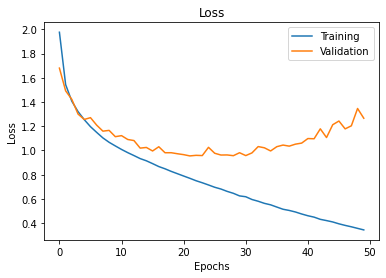

In [154]:
##TODO: Plot the training losses and validation losses

epochs = np.arange(max_epochs)
fig, ax = plt.subplots(1, 1)
ax.plot(epochs, loss_list, label='Training')
ax.plot(epochs, loss_list_val, label='Validation')
ax.set_title('Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

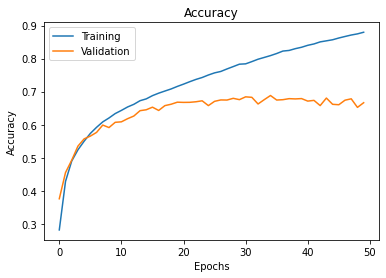

In [155]:
##TODO: Plot the training accuracies and validation accuracies
fig, ax = plt.subplots(1, 1)
ax.plot(epochs, acc_list, label='Training')
ax.plot(epochs, acc_list_val, label='Validation')
ax.set_title('Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

**5.3**

In [181]:
#Test
true_labels = []
predictions = []
correct_test = 0
net.eval()
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        ##TODO: pass the data into the network and store the output
        output = net(data)
        ##TODO: Get the prediction from the output
        _, predicted = torch.max(output, 1)
        ##TODO: Calculate the correct number and add the number to correct_test
        correct_test += (predicted==label).sum().item()
        ##TODO: update predictions list and true label list
        true_labels.append(label.tolist()[0])
        predictions.append(predicted.tolist()[0])
        ##We can directly append the value because here batch_size=1

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct_test / len(test_set)))

Accuracy on the 10000 test images: 67.12 %


Test accuracy is ~67%. The most confused classes are cats and dogs. And the 3rd most confused
class is deer. That makes sense because they are very similar with each other and moreover, these are 3
similar classes compared to all other classes that can be similar to each other in pairs, like trucks and
cars, or birds and planes, but not 3 strongly "competing" classes.

Birds and planes are 2nd worst group because they can be very similar to each other sometimes.

[[645  40 112  27  25   7  32  16  68  28]
 [ 12 834  13  10   5   4  18   3  22  79]
 [ 39   7 612  61  76  37  97  45  16  10]
 [ 17  14 113 473  73 101 123  54  12  20]
 [ 12   9 112  72 582  22 106  65  15   5]
 [  6   7  88 212  48 470  67  91   8   3]
 [  2   3  40  35  21  10 868  10   8   3]
 [ 16   5  48  62  83  36  22 712   1  15]
 [ 55  56  29  16   4   4  22   6 766  42]
 [ 21 111  16  14  12   7  23  17  29 750]]


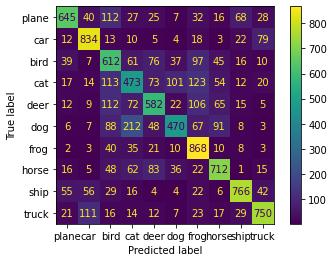

In [182]:
##TODO: print the confusion matrix of test set
##You can use sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()